<a href="https://colab.research.google.com/github/DhanshreeRajput/TCSion-Project/blob/main/Copy_of_Handwritten_Letter_Classification_Challenge_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Deep Learning Project - 1:

Handwritten Letter Classification Challenge:

Train a deep learning model to classify any 10 letters from one of the Indian languages. The project involves the following steps;

1. Collect images of handwritten letters of one of the Indian languages
2. Split the data into train and test tests (80% train and 20% test)
3. Train a classification model using Convolutional Neural Networks using your own architecture on the training data
4. Validate the model on the test data
5. Fine tune the parameters to increase the classification accuracies of the model on training and test data.








In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dhanshreerajput","key":"b277a141582722fb2c76c06f1fd5d09a"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                title                                   size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------  -------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                    DAIGT V2 Train Dataset                  29MB  2023-11-16 01:38:36           2725        237  1.0              
bhavikjikadara/car-price-prediction-dataset        Car Price Prediction Dataset             4KB  2023-12-23 07:07:54            857         28  0.9411765        
thedevastator/global-video-game-sales-and-reviews  Global Video Game Sales and Reviews     56KB  2023-12-20 06:36:51            819         22  1.0              
vassyesboy/netflix-engagement-jan-jun-23           Netflix Engagement (Jan - Jun 23) +      2MB  2023-12-15 11:58:07            898         25  1.0              
muhammadbinimran/housing-pri

In [ ]:
!kaggle datasets download -d rishianand/devanagari-character-set

 99% 117M/118M [00:03<00:00, 42.4MB/s]
100% 118M/118M [00:03<00:00, 32.3MB/s]


In [ ]:
! unzip devanagari-character-set.zip

Streaming output truncated to the last 5000 lines.
  inflating: Images/Images/digit_7/56662.png  
  inflating: Images/Images/digit_7/56663.png  
  inflating: Images/Images/digit_7/56664.png  
  inflating: Images/Images/digit_7/56665.png  
  inflating: Images/Images/digit_7/56666.png  
  inflating: Images/Images/digit_7/56667.png  
  inflating: Images/Images/digit_7/56668.png  
  inflating: Images/Images/digit_7/56669.png  
  inflating: Images/Images/digit_7/56670.png  
  inflating: Images/Images/digit_7/56671.png  
  inflating: Images/Images/digit_7/56672.png  
  inflating: Images/Images/digit_7/56673.png  
  inflating: Images/Images/digit_7/56674.png  
  inflating: Images/Images/digit_7/56675.png  
  inflating: Images/Images/digit_7/56676.png  
  inflating: Images/Images/digit_7/56677.png  
  inflating: Images/Images/digit_7/56678.png  
  inflating: Images/Images/digit_7/56679.png  
  inflating: Images/Images/digit_7/56680.png  
  inflating: Images/Images/digit_7/56681.png  
  inflati

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [ ]:
data = pd.read_csv('data.csv')
data.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [ ]:
data.shape

(92000, 1025)

In [ ]:
data.groupby("character").count()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
character,,,,,,,,,,,,,,,,,,,,,
character_01_ka,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_02_kha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_03_ga,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_04_gha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_05_kna,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_06_cha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_07_chha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_08_ja,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_09_jha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000


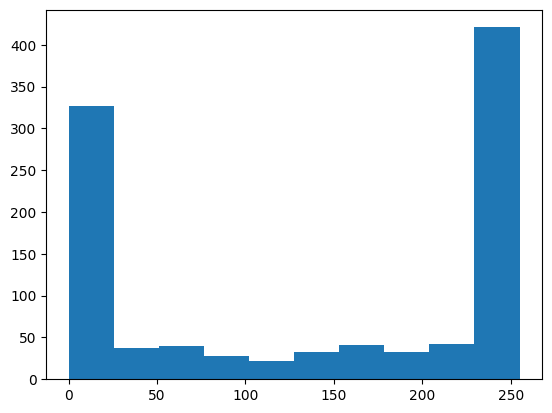

In [ ]:
#Pixel Distribution
plt.hist(data.iloc[0,:-1])
plt.show()

In [ ]:
#splitting the Data
X=data.iloc[:,:-1]/255
y=data.iloc[:,-1].values

In [ ]:
y

array(['character_01_ka', 'character_01_ka', 'character_01_ka', ...,
       'digit_9', 'digit_9', 'digit_9'], dtype=object)

In [ ]:
char_names=data.character.unique()
char_names

array(['character_01_ka', 'character_02_kha', 'character_03_ga',
       'character_04_gha', 'character_05_kna', 'character_06_cha',
       'character_07_chha', 'character_08_ja', 'character_09_jha',
       'character_10_yna', 'character_11_taamatar', 'character_12_thaa',
       'character_13_daa', 'character_14_dhaa', 'character_15_adna',
       'character_16_tabala', 'character_17_tha', 'character_18_da',
       'character_19_dha', 'character_20_na', 'character_21_pa',
       'character_22_pha', 'character_23_ba', 'character_24_bha',
       'character_25_ma', 'character_26_yaw', 'character_27_ra',
       'character_28_la', 'character_29_waw', 'character_30_motosaw',
       'character_31_petchiryakha', 'character_32_patalosaw',
       'character_33_ha', 'character_34_chhya', 'character_35_tra',
       'character_36_gya', 'digit_0', 'digit_1', 'digit_2', 'digit_3',
       'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9'],
      dtype=object)

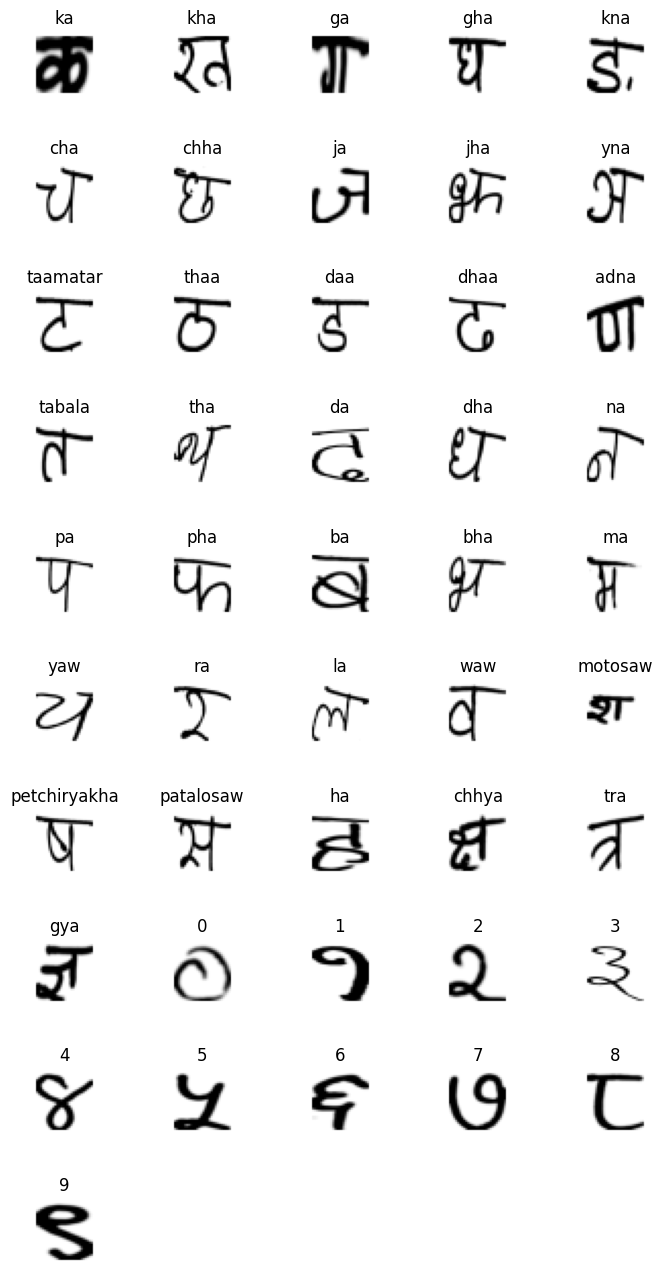

In [ ]:
# Visualizing the Charater

rows =10;columns=5;
fig, ax = plt.subplots(rows,columns, figsize=(8,16))
for row in range(rows):
    for col in range(columns):
        ax[row,col].set_axis_off()
        if columns*row+col < len(char_names):
            x = data[data.character==char_names[columns*row+col]].iloc[0,:-1].values.reshape(32,32)
            x = x.astype("float64")
            x/=255
            ax[row,col].imshow(x, cmap="binary")
            ax[row,col].set_title(char_names[columns*row+col].split("_")[-1])


plt.subplots_adjust(wspace=1, hspace=1)
plt.show()

In [ ]:
#Splitting Data in to train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(64400, 1024)
(64400,)
(27600, 1024)
(27600,)


In [ ]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [ ]:
y_train

array([38, 34,  1, ..., 38,  0,  7])

In [ ]:
print(X_train.shape)
print(X_test.shape)

(64400, 1024)
(27600, 1024)


MODEL BUILDING

In [ ]:
# Random Forest
RF= RandomForestClassifier(n_estimators= 100, criterion="entropy")
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
#Predicting the test set result
y_pred= RF.predict(X_test)

In [ ]:
from sklearn import metrics
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9069202898550724


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm)

Confusion Matrix: [[569   0   0 ...   0   0   0]
 [  2 510   0 ...   1   0   1]
 [  0   7 499 ...   0   0   1]
 ...
 [  1   0   0 ... 584   0   0]
 [  1   0   0 ...   1 579   0]
 [  0   0   0 ...   1   0 559]]


In [ ]:
# performance evaluatio metrics

from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       603
           1       0.86      0.92      0.89       554
           2       0.88      0.93      0.91       534
           3       0.81      0.84      0.82       583
           4       0.88      0.92      0.90       594
           5       0.95      0.88      0.91       645
           6       0.81      0.88      0.85       520
           7       0.91      0.94      0.93       580
           8       0.93      0.97      0.95       570
           9       0.91      0.91      0.91       574
          10       0.95      0.93      0.94       635
          11       0.95      0.88      0.91       616
          12       0.89      0.91      0.90       588
          13       0.94      0.90      0.92       599
          14       0.93      0.89      0.91       624
          15       0.96      0.91      0.94       621
          16       0.82      0.87      0.84       602
          17       0.83    

HYPERPARAMETER TUNNING


In [ ]:
"""
from sklearn.model_selection import GridSearchCV,\
RandomizedSearchCV


param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

grid_search=GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)  """

"\nfrom sklearn.model_selection import GridSearchCV,RandomizedSearchCV\n\n\nparam_grid = {\n    'n_estimators': [25, 50, 100, 150],\n    'max_features': ['sqrt', 'log2', None],\n    'max_depth': [3, 6, 9],\n    'max_leaf_nodes': [3, 6, 9],\n}\n\ngrid_search=GridSearchCV(RandomForestClassifier(),param_grid=param_grid)\ngrid_search.fit(X_train, y_train)\nprint(grid_search.best_estimator_)  "

In [ ]:
 """ model_grid = RandomForestClassifier(max_depth=9,
                                    max_features="log2",
                                    max_leaf_nodes=9,
                                    n_estimators=25)
model_grid.fit(X_train, y_train)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))  """

' model_grid = RandomForestClassifier(max_depth=9,\n                                   max_features="log2",\n                                   max_leaf_nodes=9,\n                                   n_estimators=25)\nmodel_grid.fit(X_train, y_train)\ny_pred_grid = model.predict(X_test)\nprint(classification_report(y_pred_grid, y_test))  '

CONVOLUTIONAL NEURAL NETWORK

In [ ]:
img_height_rows = 32
img_width_cols = 32

In [ ]:
print(X_train.shape)
print(y_train.shape)

(64400, 1024)
(64400,)


In [ ]:
im_shape = (img_height_rows, img_width_cols, 1)
X_train = X_train.values.reshape(X_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
X_test = X_test.values.reshape(X_test.shape[0], *im_shape)

In [ ]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='Same'))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='Same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=46,activation='softmax'))


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [ ]:
history=model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_test,y_test))
#history = model.fit(X_train,y_train,batch_size=128,epochs=10, verbose=1, validation_split= 0.30)

Epoch 1/10
2013/2013 [==============================] - 189s 94ms/step - loss: 0.1733 - accuracy: 0.9454 - val_loss: 0.1455 - val_accuracy: 0.9564
Epoch 2/10
2013/2013 [==============================] - 168s 84ms/step - loss: 0.1252 - accuracy: 0.9594 - val_loss: 0.1208 - val_accuracy: 0.9643
Epoch 3/10
2013/2013 [==============================] - 172s 86ms/step - loss: 0.0990 - accuracy: 0.9683 - val_loss: 0.1016 - val_accuracy: 0.9704
Epoch 4/10
2013/2013 [==============================] - 159s 79ms/step - loss: 0.0838 - accuracy: 0.9729 - val_loss: 0.0944 - val_accuracy: 0.9733
Epoch 5/10
2013/2013 [==============================] - 160s 80ms/step - loss: 0.0723 - accuracy: 0.9761 - val_loss: 0.0924 - val_accuracy: 0.9732
Epoch 6/10
2013/2013 [==============================] - 165s 82ms/step - loss: 0.0614 - accuracy: 0.9794 - val_loss: 0.0953 - val_accuracy: 0.9723
Epoch 7/10
2013/2013 [==============================] - 158s 79ms/step - loss: 0.0552 - accuracy: 0.9821 - val_loss: 0

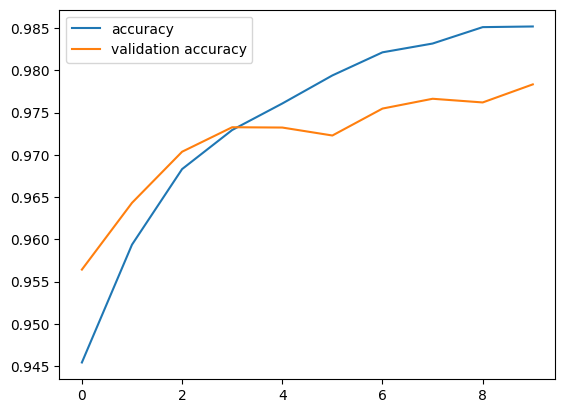

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.legend(loc='best')
plt.show()

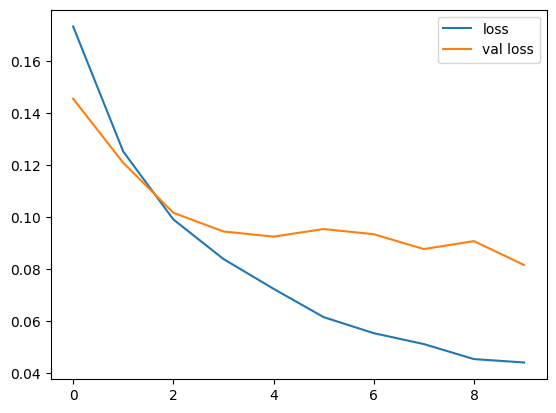

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend(loc='best')
plt.show()

In [ ]:
# Evaluating confusion matrix
res = tf.math.confusion_matrix(y_test, y_pred)
# Printing the result
print('Confusion_matrix: ',res)

Confusion_matrix:  tf.Tensor(
[[569   0   0 ...   0   0   0]
 [  2 510   0 ...   1   0   1]
 [  0   7 499 ...   0   0   1]
 ...
 [  1   0   0 ... 584   0   0]
 [  1   0   0 ...   1 579   0]
 [  0   0   0 ...   1   0 559]], shape=(46, 46), dtype=int32)


Note: Achieved More than 95% Accuracy with CNN